In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

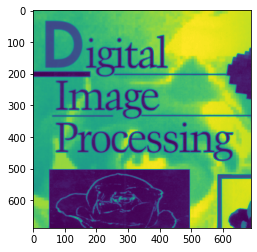

In [ ]:
img=cv2.imread('/content/digim.tif',0)
plt.imshow(img)

In [ ]:
ft_img=np.fft.fft2(img)
fshift = np.fft.fftshift(ft_img)
magnitude_spectrum = 20*np.log(np.abs(fshift))

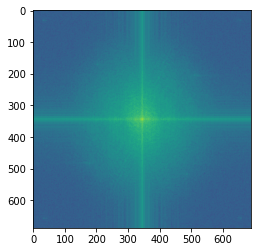

In [ ]:
plt.imshow(magnitude_spectrum)

In [ ]:
def deg_func(T,a,b,m,n):
  H = np.ones((m,n))*1j
  for i in range(m):
    for j in range(n):
      u=i-m/2
      v=j-n/2
      H[i,j]=T/(math.pi*(a*u+b*v))*math.sin(math.pi*(a*u+b*v))*(math.cos(math.pi*(a*u+b*v))-1j*math.sin(math.pi*(a*u+b*v))) if u+v!=0 else 1
  return H

In [ ]:
H=deg_func(1,0.1,0.1,fshift.shape[0],fshift.shape[1])

In [ ]:
G=H*fshift

In [ ]:
f_ishift = np.fft.ifftshift(G)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

In [ ]:
cv2.imwrite('/content/digim2.png',img_back)

True

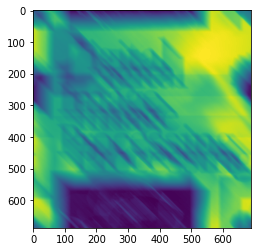

In [ ]:
plt.imshow(img_back)

In [ ]:
no_blur=G/H

In [ ]:
fd_ishift = np.fft.ifftshift(no_blur)
imgd_back = np.fft.ifft2(fd_ishift)
imgd_back = np.abs(imgd_back)

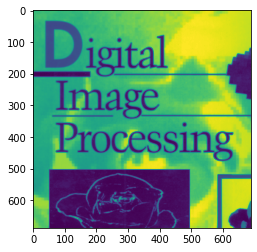

In [ ]:
plt.imshow(imgd_back)